# Use multiple kernels in one Jupyter notebook

* **Difficulty level**: easy
* **Time need to lean**: 10 minutes or less
* **Key points**:
  * SoS starts and manages other jupyter kernels as subkernels
  * Each codecell belongs to either SoS or one of the subkernels
  * Subkernels can be selected from cell-level language-selection dropdown box, or SoS magics  

## User Interface <a id="User_Interface"></a>

![user_interface](../media/JupyterNotebook.png)

The SoS frontend is based on the Jupyter notebook frontend but adds a side panel and dropdown lists for all code cell.

SoS is also available to JupyterLab but the side panel is currently unavailable.

### cell content <a id="cell_content"></a>

A SoS Jupyter notebook accepts the following types of cells:

| Cell type | Content |Interpreted by| Behavior |
|---------- | ----------------- |----------| ---- |
|**Markdown**| Markdown text |Jupyter| can be evaluated to have title, table etc|
|**Subkernel**| Statements in other languages with optional SoS magics| Subkernels| SoS prepares statements and evaluate them in subkernels such as R. |
|**SoS**| SoS statements without section header| SoS Notebook | Evaluate the cell as a SoS step in a persistent SoS dictionary.|
|**Workflow**| SoS statements with section header | SoS Command | Can only be executed by magic `%run` (workflow in the current cell) or `%sosrun` (workflow in the entire notebook).|

The **markdown cells** contains Markdown text and are rendered by Jupyter. These cells are used for displaying rich-format texts such as title and table. Most of the content of this documentation is written in such cells.

The kernel of each **code cell** is marked by the language selector at the top-right corner of each code cell, and by the color of the prompt area of the cell. For example, the following cell is a code cell with kernel `R`.

In [3]:
paste('This', 'is', 'cool', '!')

[1] "This is cool !"

Similar to other Jupyter kernels, SoS defines a number of *magics*, which are special commands that start with character `%`. For example, expression `{2**4}` in the following code cell is expanded by magic `%expand` before it is passed to the underlying R kernel.

In [4]:
%expand
cat("The value of expression '2**4' in Python is {2**4}")

The value of expression '2**4' in Python is 16

A note of caution is that because the underlying kernels also accepts their own magics, SoS magics in subkernel cells must start from the first lines. The following code will send `%expand` to the underlying Python3 kernel and cause an error. SoS cells are not affected by this restriction so you can put magics, new lines, even comments before actual cell content.

In [5]:

%expand

UsageError: Line magic function `%expand` not found.


A cell with a SoS kernel can be either a **SoS cell** or a **Workflow cell**, with the latter containing **section headers**. A scratch cell is executed with a SoS kernel so that you can execute arbitrary SoS (Python) statements,

In [6]:
print('This is a scratch cell')

This is a scratch cell


or a single SoS step without header

In [7]:
%preview -n rand.txt
output: 'rand.txt'
R: expand=True
    cat(rnorm(5), file='{_output}')

%preview rand.txt

> rand.txt (51 B):

0 line

-0.2379578 -0.267737 -1.040099 0.1863217 -0.2325915

here a SoS magic `%preview` is used to preview the output of the cell.

The last type of SoS cell contains formal definition of SoS steps. These cells define complete SoS workflows and can only be executed by SoS magics (with magics `%run` or `%sosrun`) in Jupyter or by SoS commands from command line. For example, executing the following cell would not execute any statement.

In [8]:
[test_20]
print(f"This is step {step_name} of a workflow")

and you can execute the cell with a SoS magic `%run`.

In [9]:
%run wf
[wf_20]
print(f"This is step {step_name} of a workflow")

,WF,Workflow ID 3B4C7C08FA583377,Index #1,completed Ran for < 5 seconds


This is step wf_20 of a workflow


What is even more magical about these cells is that they form **notebook workflows** that consist of all sections defined in the Jupyter notebook. A `%sosrun` magic would collect all workflow stepss in a notebook and execute them.

In [10]:
%sosrun wf
[wf_30]
print(f"This is step {step_name} of a workflow")

,WF,Workflow ID 0C0BECAB6328BF28,Index #2,completed Ran for 0 sec


This is step wf_20 of a workflow
This is step wf_30 of a workflow


SoS provides a rich environment for you to analyze data in different languages. Generally speaking, you can

* Use subkernels to analyze data interactively using different languages.
* Use SoS cells to execute complete (and separate) scripts to analyze data or test steps of workflows, and
* If needed, convert SoS cells to workflow cells to create complete workflows to analyze data in batch mode.

### Switch between kernels <a id="Switch_between_kernels"></a>

One of the most important features of the SoS kernel is its support for multiple Jupyter subkernel. A `subkernel` can be any [Jupyter supported kernels](https://github.com/ipython/ipython/wiki/IPython-kernels-for-other-languages) that have been installed locally (or a [remote ikernel](https://bitbucket.org/tdaff/remote_ikernel) with a local definition). 

A subkernel has the following properties:

| Property | Example | Options of magics `%use` and `%with` | Comments |
|---| ---| | ---|
|**name** | `R`, `R2` | (positional) |Name to identify the subkernel, usually the same as language name |
|**kernel** | `ir`, `python`, `R_remote` | `-k`, `--kernel`| Name of Jupyter kernel, must be show in the output of command `jupyter kernelspec list`|
|**language** | `R`, `Python2` |`-l`, `--language`| SoS definition of the language, which enables magics `%get` and `%get` for the kernel.|
|**color** | `red`, `#FAEBD7`|`-c`, `--color`|Background color of the cell, with default defined by language definition.|

You can switch the kernel of a code cell from a dropdown list at the top right corner of the cell or using the `%use` or `%with` magic. Despite of the flexibility on the use of local and remote kernels, multiple instances of the same kernel, use of self-defined languages, the majority of the times you will be using magics like

```
%use R
```

to switch to a language with default kernel (`ir`), color (`FDEDEC`), and name (`R`).

In [11]:
%use R

starts and switches to a `ir` kernel so that you can enter any R commands as if you are working on a notebook with a `ir` kernel. Note that `R` stands for a SoS language extension that uses kernel `ir` and you have to use the kernel name (e.g. `iperl`) if there is no language extension for the kernel.

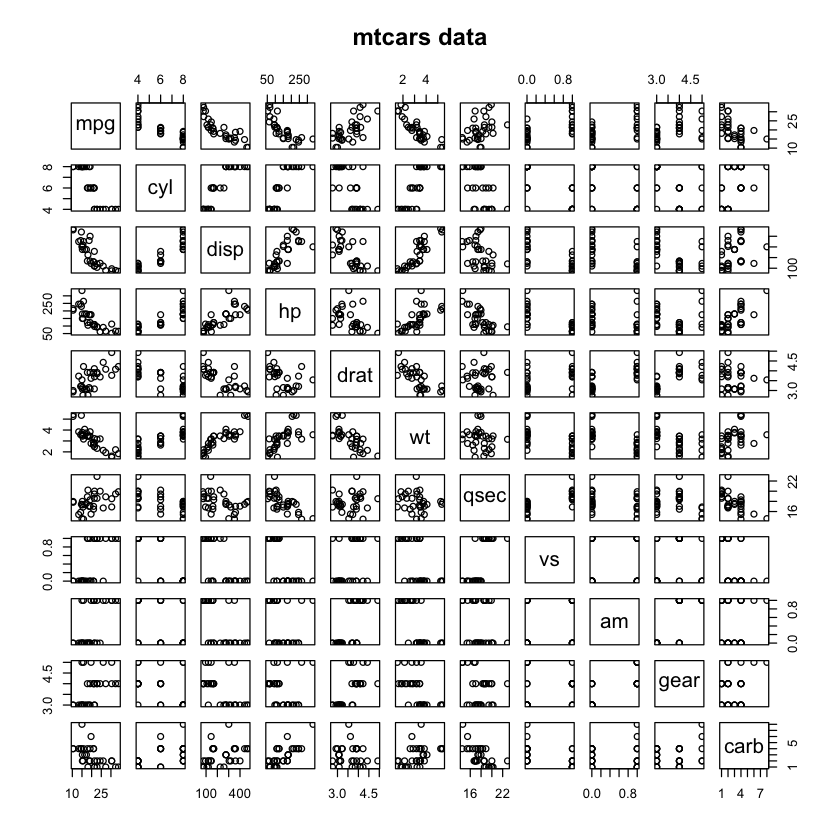

In [12]:
require(graphics)
pairs(mtcars, main = "mtcars data")

As you can see, a different style is used for cells executed by the `ir` kernel. After you are done with the `ir` kernel, you can switch back to the SoS kernel using magic

In [13]:
%use sos

The `%with` magic is similar to magic `%use` but it does not start a new kernel, and it accepts options `--in` (`-i`) and `--out` (`-o`) to pass specified input variables to the kernel, and return specified output variables from the kernel after the completion of the evaluation.

For example, if you have

In [14]:
n = 3

you can pass the input and output variables to magic `%with`

In [15]:
%with R -i n -o arr
arr = rnorm(n)

and obtain the result in the SoS kernel

In [16]:
arr

[-1.04893205572007, 0.700078926097665, -0.334921652134619]

Note that any new cell will inherit the kernel of its previous code cell.

## <a id="magic_capture"></a>`%capture`

The `capture` magic is executed after the evaluation of the current cell (in SoS or any subkernel), capture the output of the cell (either `stdout` (`stdout` of `stream` message type, the default), `stdout` (`stderr` of `stream` messages), `text` (`text/html` of `display_data` messages), `html` (`text/html` of `display_data` messages), or `raw` (all messages as a list, mostly for debugging purposes). The results are saved to a variable specified by options `--to` or `--append`.

When the capture type is plain text (from `stdout`, `stderr`, or `text`), the return result can be parse it as `text`, `json`, `csv`, or `tsv`, and save (`--to`) or append (`--append`) the result to specified variable  as text, Python dictionary, or `Pandas` `DataFrame`.

In [1]:
%capture -h

usage: %capture [-h] [--as [{text,json,csv,tsv}]] [-t VAR | -a VAR]
                [{stdout,stderr,text,markdown,html,raw}]

Capture output (stdout) or output file from a subkernel as variable in SoS

positional arguments:
  {stdout,stderr,text,markdown,html,raw}
                        Message type to capture, default to standard output.
                        In terms of Jupyter message types, "stdout" refers to
                        "stream" message with "stdout" type, "stderr" refers
                        to "stream" message with "stderr" type, "text",
                        "markdown" and "html" refers to "display_data" message
                        with "text/plain", "text/markdown" and "text/html"
                        type respectively. If "raw" is specified, all returned
                        messages will be returned in a list format.

optional arguments:
  -h, --help            show this help message and exit
  --as [{text,json,csv,tsv}]
                        

The magic can be applied to any kernel (including SoS) but it only captures output as standard output. For example, in the following R code, although both statements print something, only the `cat` function writes to standard output. The result of function `paste` is returned as the result of the cell and is displayed.

In [2]:
%capture --to R_out
cat("this is to stdout")
paste("this is the return value")

this is to stdout

[1] "this is the return value"

In [3]:
R_out

'this is to stdout'

Now, if you would like to capture the output of `paste`, you will have to specify `text` to capture text output of the cell:

In [5]:
%capture text --to R_out
paste("this is the return value")

[1] "this is the return value"

In [6]:
R_out

'[1] "this is the return value"'

If you do not know what the cell outputs, you can use option `raw` to display every output messages and decide how to capture it. When no `--to` option is specified, the output will be written to `__captured` and be displayed in the side panel.

In [8]:
%capture raw
paste("this is the return value")

[1] "this is the return value"

Option `--as` tries to convert the captured data in a more useful format. For example, if we are doing a sparql search, which outputs result in JSON format:

The ability to parse tables as `Pandas` `DataFrame` is convenient but magic parse tables with `pandas.read_csv(sep)` with any additional parameter. If you need more flexibility in parsing the table (e.g. table without header), you will have to capture the output as text and parse it by yourself.

## Further reading

* re